In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
import warnings
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape 

(768, 9)

In [ ]:
df.isna().sum() #there are no missing values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.isnull().any().sum()

0

In [ ]:
df.dtypes #check the type of every column in our dataset

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
All = df.shape[0]
diabetes = df[df['Outcome'] == 1]
nondiabetes = df[df['Outcome'] == 0]

x = len(diabetes)/All
y = len(nondiabetes)/All

print('diabetes :',x*100,'%')
print('No diabetes :',y*100,'%')

diabetes : 34.89583333333333 %
No diabetes : 65.10416666666666 %


Text(0, 0.5, 'Frequency')

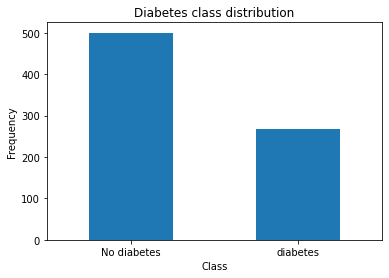

In [ ]:
labels = ['No diabetes','diabetes']

classes = pd.value_counts(df['Outcome'], sort = True)
classes.plot(kind = 'bar', rot=0)

plt.title("Diabetes class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

<AxesSubplot:ylabel='Count'>

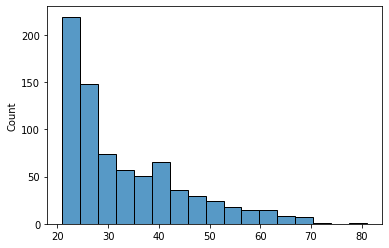

In [ ]:
age = df['Age'].values
sns.histplot(age)

<AxesSubplot:ylabel='Count'>

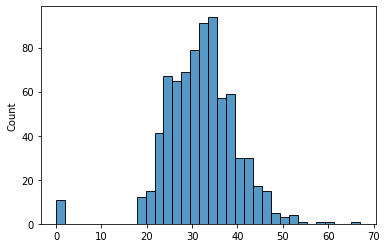

In [ ]:
BMI = df['BMI'].values
sns.histplot(BMI)

<AxesSubplot:ylabel='Count'>

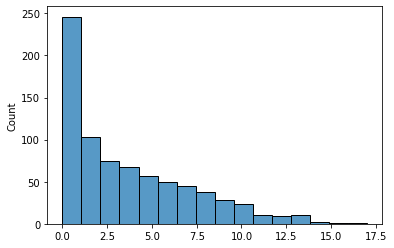

In [ ]:
pregrancies = df['Pregnancies'].values
sns.histplot(pregrancies)

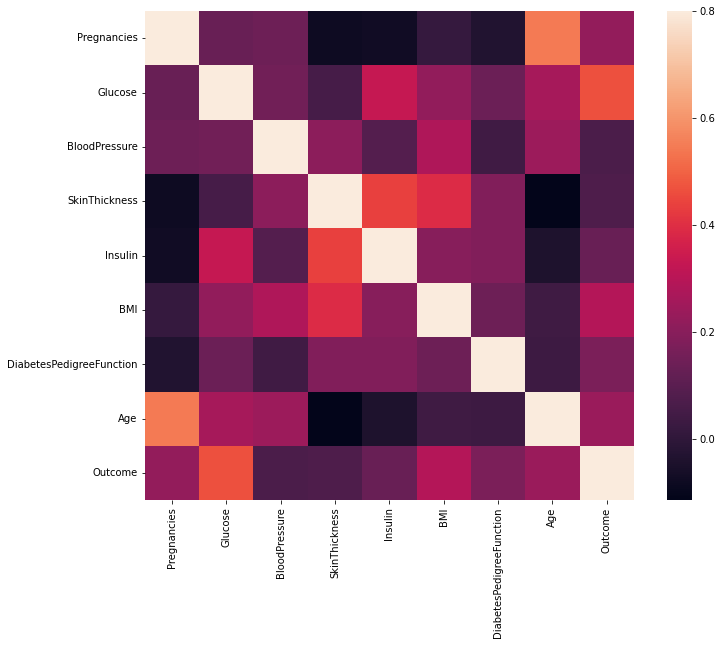

In [ ]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [ ]:
#normalization
old_insulin_column = df['Insulin']
normalizer = Normalizer().fit([old_insulin_column])
df2 = pd.DataFrame(normalizer.transform([old_insulin_column]))
df2 = df2.transpose()

In [ ]:
df['Insulin'] = df2

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.000000,33.6,0.627,50,1
1,1,85,66,29,0.000000,26.6,0.351,31,0
2,8,183,64,0,0.000000,23.3,0.672,32,1
3,1,89,66,23,0.024208,28.1,0.167,21,0
4,0,137,40,35,0.043266,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,0.046357,32.9,0.171,63,0
764,2,122,70,27,0.000000,36.8,0.340,27,0
765,5,121,72,23,0.028844,26.2,0.245,30,0
766,1,126,60,0,0.000000,30.1,0.349,47,1


<AxesSubplot:ylabel='Count'>

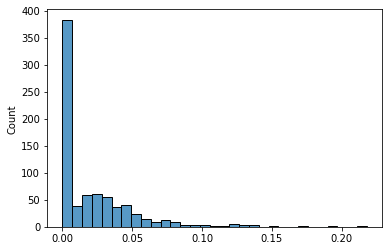

In [ ]:
insulin = df['Insulin'].values
sns.histplot(insulin)

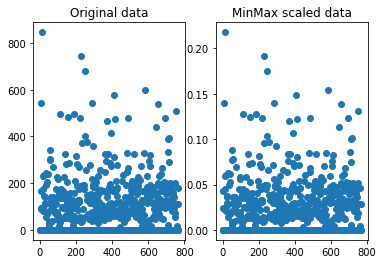

In [ ]:
fig, axes = plt.subplots(1,2)

np_array = np.arange(0, 768)
df_array = pd.DataFrame(np_array)

axes[0].scatter(df_array, old_insulin_column)
axes[0].set_title("Original data")

axes[1].scatter(df_array, df2)
axes[1].set_title("MinMax scaled data")
plt.show()

In [ ]:
X= df.iloc[:, 0:8]
y = df["Outcome"]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0.000000,33.6,0.627,50
1,1,85,66,29,0.000000,26.6,0.351,31
2,8,183,64,0,0.000000,23.3,0.672,32
3,1,89,66,23,0.024208,28.1,0.167,21
4,0,137,40,35,0.043266,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,0.046357,32.9,0.171,63
764,2,122,70,27,0.000000,36.8,0.340,27
765,5,121,72,23,0.028844,26.2,0.245,30
766,1,126,60,0,0.000000,30.1,0.349,47


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Data Mining/X_train.csv')
X_test.to_csv('/content/drive/MyDrive/Data Mining/X_test.csv')
y_train.to_csv('/content/drive/MyDrive/Data Mining/y_train.csv')
y_test.to_csv('/content/drive/MyDrive/Data Mining/y_test.csv')